In [1]:
import pandas as pd
import numpy as np
import gc

from scipy import stats
from matplotlib import pyplot as plt
from collections import Counter

In [2]:
def csv_read(p_path,header_is=0):
    pd_data=pd.read_csv(p_path, sep=',',header=header_is)
    column_names=pd_data.columns.values.tolist()
    print(column_names)
    return pd_data,np.array(pd_data),column_names

#-------------------------------------------------------------------------------------
def write_to_csv(p_data,p_path):
    dataframe = pd.DataFrame(p_data)
    dataframe.to_csv(p_path, mode='a',header=False,index=False,sep=',')
    del dataframe
    gc.collect()
    
#-------------------------------------------------------------------------------------
def bar_figure(group1,group2,y_label):
    figure,axes=plt.subplots()
    
    axes.boxplot([group1,group2],patch_artist=True)
    plt.xticks(range(1,3),['Group 1','Group 2'])
    #plt.yticks(fontsize = 20)
    
    min_end=min(np.min(group1),np.min(group2))
    max_end=max(np.max(group1),np.max(group2))
    end=(max_end-min_end)/10
    plt.ylim(min_end-end,max_end+end)
    plt.ylabel(y_label)
    plt.show()

#-------------------------------------------------------------------------------------
def statistic_analysis(group1, group2):
    var_same=stats.levene(group1, group2)
    
    print("\n")
    print("-"*80)
    
    print("var_same",var_same)

    if var_same[1]>0.05:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=True)
        print("Test: f_t, p_value_t", format(f_t,'.3E'), format(p_value_t,'.3E'))
    else:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=False)
        print("Test: f_t, p_value_t",format(f_t,'.3E'), format(p_value_t,'.3E'))
    
    f, p_value = stats.f_oneway(group1, group2)
    print("ANOVA: f, p_value:",format(f,'.3E'), format(p_value_t,'.3E'))
    print("-"*80)
    print("\n")
    
#-------------------------------------------------------------------------------------
def draw_bar(p_data,p_title):
    fz=20
    params = {'figure.figsize': '8, 6'}
    plt.rcParams.update(params)
    width=0.3

    colors=['#d5695d','#5d8ca8','green','purple']

    different_elements_keys=np.unique(p_data)
    keys_values = Counter(p_data)
    total_counts=np.sum([*keys_values.values()])
    total_index=np.arange(len(different_elements_keys))
    for i in total_index:
        different_elements_keys_i=different_elements_keys[i]
        rects_1=plt.bar(i,keys_values[different_elements_keys_i]/total_counts,width,color=colors[i])

    plt.xticks(total_index,different_elements_keys,fontsize=fz)
    plt.yticks(np.arange(0,1,0.2),fontsize=fz)
    plt.ylim(0,1)
    plt.title(p_title)
    plt.show()

In [3]:
data,data_arr,column_names=csv_read('./data/survival_data_filtered_3.csv')
column_names_arr=np.array(column_names)

FS_data,FS_data_arr,_=csv_read('./feature_selection.csv',header_is=None)

['NACCREAS', 'NACCREFR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'RACE', 'RACESEC', 'RACETER', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NACCFADM', 'NACCFFTD', 'MEMORY', 'ORIENT', 'JUDGMENT', 'COMMUN', 'HOMEHOBB', 'PERSCARE', 'CDRSUM', 'DECSUB', 'DECIN', 'COGMEM', 'COGJUDG', 'COGLANG', 'COGVIS', 'COGATTN', 'COGOTHR', 'NACCCOGF', 'COGMODE', 'DECAGE', 'BEAPATHY', 'BEDEP', 'BEVHALL', 'BEAHALL', 'BEDEL', 'BEDISIN', 'BEIRRIT', 'BEAGIT', 'BEPERCH', 'BEOTHR', 'NACCBEHF', 'BEMODE', 'MOGAIT', 'MOFALLS', 'MOTREM', 'MOSLOW', 'NACCMOTF', 'MOMODE', 'COURSE', 'FRSTCHG', 'NORMCOG', 'DEMENTED', 'NACCPPA', 'NACCBVFT', 'NACCLBDS', 'NACCTMCI', 'NACCMCIL', 'NACCMCIA', 'NACCMCIE', 'NACCMCIV', 'NACCMCII', 'IMPNOMCI', 'NACCALZD', 'NACCALZP', 'NACCLBDE', 'NACCLBDP', 'PARK', 'PSP', 'PSPIF', 'CORT', 'CORTIF', 'DOWNS', 'DOWNSIF', 'HUNT', 'HUNTIF', 'PRION', 'PRIONIF', 'BRNINJ', 'BRNINJIF', 'HYCEPH', 'HYCEPHIF', 'NEOP', 'NEOPIF', 'DEP', 'DEPIF', 'OTHPSY', 'OTHPSYIF',

In [4]:
used_number_features=10
FS_data_used=FS_data_arr[-1,0:used_number_features]

Feature:  NACCAGE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.45176458528803476, pvalue=0.502029636366425)
Test: f_t, p_value_t -1.990E-01 8.424E-01
ANOVA: f, p_value: 3.961E-02 8.424E-01
--------------------------------------------------------------------------------


Group1:  [97 69 81 68 77 93 91 61 75 86 71 94 88 83 86 67 80 65 83 86 95 76 68 73
 64 84 80 66 92 90 83 64 82 87 87 84 72 96 79 69 86 75 79 74 84 75 75 80
 80 83 92 83 83 88 69 69 81 72 76 80 93 81 78 83 87 78 85 55 89 67 95 80
 78 79 66 88 78 88 78 71 72 74 72 90 85 90 81 87 93 96 82 82 93 74 58 70
 86 79 80 82 89 68 67 87 94 87 89 84 81 57 80 96 83 92 86 79 82 65 80 79
 82 78 90]


Group2:  [83 68 85 84 71 65 78 81 99 70 76 82 74 85 68 59 72 77 75 84 83 80 87 81
 72 80 81 74 86 80 67 82 78 87 78 77 78 85 88 79 98 76 78 92 72 64 90 68
 83 87 98 76 91 68 95 73 79 90 85 98 78 90 77 93 79 95 71 77 84 66 86 62
 74 87 87 73 68 86 94 86 84 71 95 80 82 8

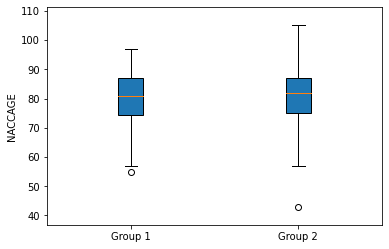

************************************************************************************************************************





Feature:  NACCIDEM


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=1.04735736462415, pvalue=0.3069635859183504)
Test: f_t, p_value_t 1.023E+00 3.070E-01
ANOVA: f, p_value: 1.047E+00 3.070E-01
--------------------------------------------------------------------------------


Group1:  [1 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 1 8 8 8 8 8 8 8 1 8 8 8 8 8 8 8 8
 1 8 8 1 1 1 8 1 8 8 8 1 8 1 8 1 8 8 8 1 8 8 8 1 8 8 8 1 8 8 8 8 8 1 8 8 8
 8 8 8 8 8 8 8 1 8 1 8 8 1 8 1 8 8 8 8 8 8 1 8 8 8 8 1 8 8 8 1 1 8 1 1 8 8
 1 8 8 8 8 8 1 8 8 1 8 8]


Group2:  [8 8 1 8 1 8 1 1 8 8 8 8 1 8 8 8 1 1 8 8 8 1 8 8 8 8 8 1 8 8 8 8 8 1 8 8 8
 8 8 8 1 8 8 1 8 8 8 8 1 1 8 8 8 8 8 8 8 1 1 8 8 8 8 1 8 1 8 8 8 1 1 8 8 8
 8 8 8 8 8 8 8 8 1 8 8 8 1 8 8 8 1 8 1 8 1 1 8 8 1 8 1 8 8 1 1 8 8 8 1 8 8
 8 1 8 8 8 8 8 1 8 1 8 1 8 8 1 8 1 8

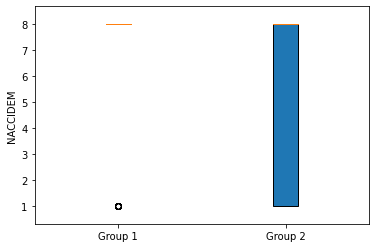

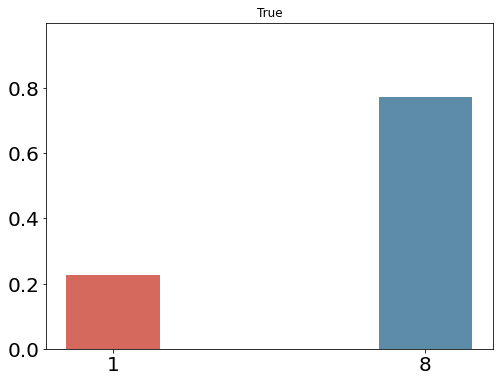

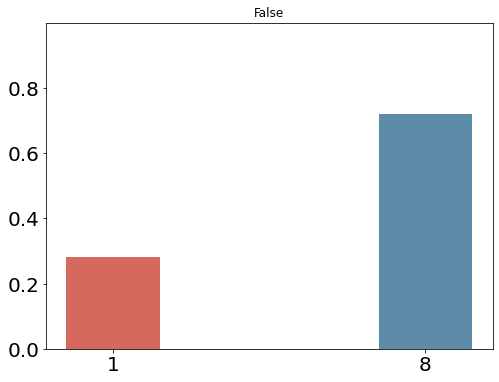

************************************************************************************************************************





Feature:  PERSCARE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=4.600622455381944, pvalue=0.032785284749623674)
Test: f_t, p_value_t 1.300E+01 8.211E-31
ANOVA: f, p_value: 1.525E+02 8.211E-31
--------------------------------------------------------------------------------


Group1:  [3.0 3.0 3.0 3.0 2.0 2.0 2.0 3.0 2.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 2.0 2.0
 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 2.0 3.0 2.0 2.0 3.0 3.0 2.0 2.0 3.0 2.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 2.0 3.0 2.0 2.0 3.0 3.0 3.0 3.0 3.0
 2.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 2.0 1.0 3.0 3.0 3.0 3.0 3.0 3.0
 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 3.0 2.0 1.0 2.0 3.0 3.0 3.0 2.0 2.0 3.0 2.0 3.0 1.0 3.0 3.0 3.0
 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 1.0 3.0 2.0 3.0 3.0]


Group2:  [2.0 0.0 

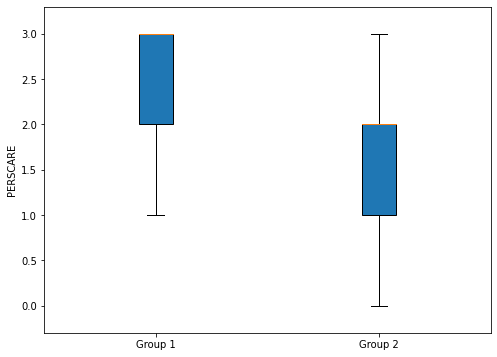

************************************************************************************************************************





Feature:  NACCBVFT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=4.776412380192655, pvalue=0.02964651644974891)
Test: f_t, p_value_t 2.042E+00 4.252E-02
ANOVA: f, p_value: 4.776E+00 4.252E-02
--------------------------------------------------------------------------------


Group1:  [0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0]


Group2:  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0

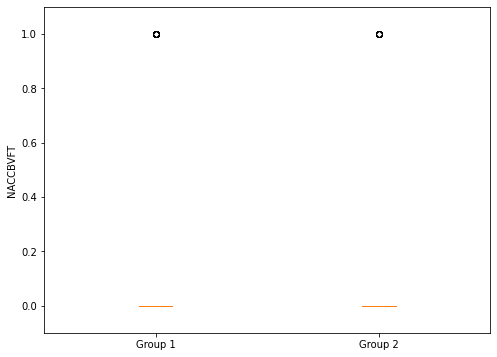

************************************************************************************************************************





Feature:  EDUC


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.6036688139596534, pvalue=0.43781057700152737)
Test: f_t, p_value_t -1.044E+00 2.973E-01
ANOVA: f, p_value: 1.090E+00 2.973E-01
--------------------------------------------------------------------------------


Group1:  [18 14 13 20 13 20 12 16 20 13 16 18 16 16 12 12 18 17 18 20 16 12 16 18
 14 16 12 18 12 14 18 12 12 99 18 8 19 20 18 18 20 18 16 19 18 12 20 12 18
 12 13 16 18 15 17 12 13 16 16 16 17 18 18 20 12 20 16 12 20 17 16 16 18
 18 18 12 11 6 20 18 13 16 18 14 12 10 18 16 14 16 16 18 12 16 16 12 18 12
 13 20 12 16 12 13 20 14 12 18 20 14 18 14 12 12 18 14 16 12 16 20 16 21
 12]


Group2:  [99 16 16 18 16 14 16 20 18 16 18 16 18 12 18 18 13 16 19 16 5 18 14 16 20
 18 16 16 20 16 14 20 14 18 12 16 18 13 12 13 18 16 10 21 18 16

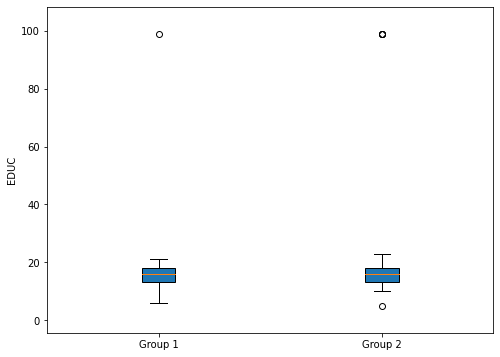

************************************************************************************************************************





Feature:  NPGRHA


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=2.221482170222581, pvalue=0.13718174041728845)
Test: f_t, p_value_t -3.707E-01 7.112E-01
ANOVA: f, p_value: 1.374E-01 7.112E-01
--------------------------------------------------------------------------------


Group1:  [1 3 2 1 3 2 3 2 2 3 3 3 3 0 2 2 2 2 3 2 0 1 8 2 3 2 3 2 2 3 1 1 2 2 1 2 2
 3 3 3 2 3 0 2 2 1 3 3 3 3 3 2 3 2 3 2 2 3 2 0 1 3 3 1 3 3 2 3 0 8 0 3 2 3
 3 3 2 1 3 3 3 1 2 0 1 2 3 3 3 3 2 3 3 3 2 3 0 3 2 0 1 1 2 3 3 0 3 2 3 2 2
 3 0 2 2 2 2 2 0 2 2 3 2]


Group2:  [0 2 2 1 8 3 0 8 2 3 3 1 0 3 2 3 1 8 3 3 1 2 2 2 3 3 1 2 2 3 3 2 1 3 3 1 3
 2 0 1 2 1 2 2 8 8 3 3 1 3 3 3 3 3 2 2 3 0 3 2 3 3 2 0 1 3 3 2 3 1 2 3 8 3
 3 1 1 3 3 2 3 0 0 3 2 3 2 2 3 3 2 1 1 1 3 3 3 2 2 2 2 3 3 1 2 3 1 2 3 0 2
 0 0 2 3 2 2 1 2 3 2 3 0 3 2 0 3 3 

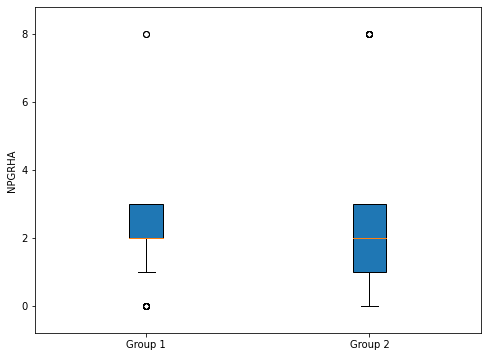

************************************************************************************************************************





Feature:  SEX


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=2.9585564240671594, pvalue=0.08648369134610147)
Test: f_t, p_value_t 2.019E+00 4.441E-02
ANOVA: f, p_value: 4.076E+00 4.441E-02
--------------------------------------------------------------------------------


Group1:  [2 2 2 1 1 1 2 1 2 2 1 2 2 2 2 2 1 2 2 1 2 2 1 1 2 2 1 2 2 1 2 1 2 2 1 1 1
 2 2 2 1 2 2 1 2 2 1 2 1 2 1 1 1 2 1 2 2 1 2 2 2 1 2 1 2 2 2 2 1 1 2 2 1 2
 1 2 2 1 1 2 2 1 1 1 2 1 2 2 2 1 1 2 2 2 1 2 2 2 2 1 2 1 1 2 2 2 2 1 1 1 2
 2 2 2 1 2 2 2 2 1 2 1 2]


Group2:  [2 1 1 2 2 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 2 2 2 1 2 2 1 2 1 2 1 1 1 1 2 1 1
 2 2 2 2 1 2 1 1 2 2 1 1 1 2 2 2 2 2 1 2 1 1 2 1 1 1 1 1 2 2 2 2 1 1 1 1 2
 2 2 2 1 2 2 2 2 2 2 2 2 1 1 2 2 1 2 1 1 2 2 1 2 2 2 1 1 2 2 2 2 2 1 2 1 1
 2 1 2 1 1 1 2 1 2 1 2 2 1 2 1 2 1 1 1

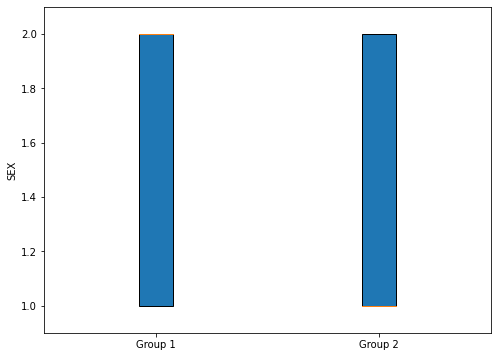

************************************************************************************************************************





Feature:  NACCMCII


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=3.7802680723945437, pvalue=0.05282052257824872)
Test: f_t, p_value_t -1.944E+00 5.282E-02
ANOVA: f, p_value: 3.780E+00 5.282E-02
--------------------------------------------------------------------------------


Group1:  [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 0]


Group2:  [0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 8 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 8 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 8 0 8 0 1 1 0

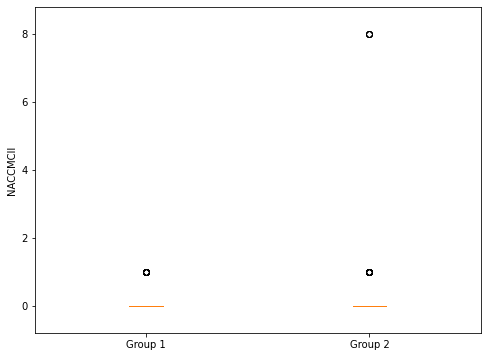

************************************************************************************************************************





Feature:  JUDGMENT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=55.21287588929159, pvalue=1.2010742533872332e-12)
Test: f_t, p_value_t 1.775E+01 1.254E-45
ANOVA: f, p_value: 2.493E+02 1.254E-45
--------------------------------------------------------------------------------


Group1:  [3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0
 3.0 3.0 2.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 2.0
 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0]


Group2:  [3.0 3.

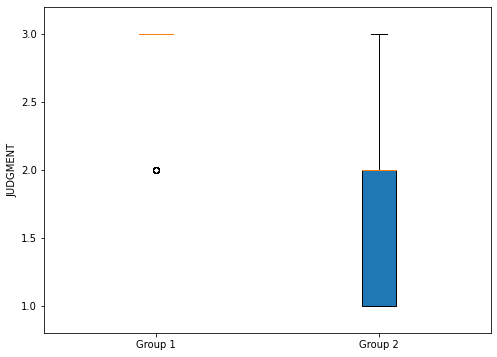

************************************************************************************************************************





Feature:  HOMEHOBB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=22.22667682599784, pvalue=3.7571161013705043e-06)
Test: f_t, p_value_t 1.689E+01 7.187E-44
ANOVA: f, p_value: 2.339E+02 7.187E-44
--------------------------------------------------------------------------------


Group1:  [3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0
 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0]


Group2:  [2.0 2.

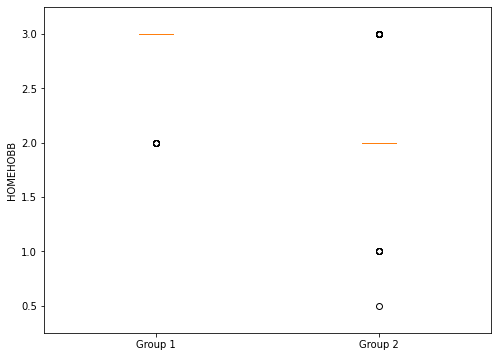

************************************************************************************************************************







In [5]:
group1_index=np.where(data_arr[:,-1]==True)[0]
group2_index=np.where(data_arr[:,-1]==False)[0]

for i in np.arange(used_number_features):
    feature_name=FS_data_used[i]
    
    print("Feature: ",feature_name)
    
    
    index_i=np.where(column_names_arr==feature_name)[0][0]
    get_data_i=data_arr[:,index_i]
    
    group1_data=get_data_i[group1_index]
    group2_data=get_data_i[group2_index]
    
    statistic_analysis(group1_data, group2_data)
    
    print("Group1: ",group1_data)
    print("\n")
    print("Group2: ",group2_data)
    print("\n")
    print("Mean: ",np.mean(group1_data),np.mean(group2_data))
    
    bar_figure(group1_data,group2_data,feature_name)
    
    if feature_name=='NACCIDEM':
        draw_bar(group1_data,'True')
        draw_bar(group2_data,'False')
            
    
    print("*"*120)
    print("\n\n\n")
    
    
    print()